In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
#About The Dataset :

#age: Age of the patient

#sex: Sex of the patient

#cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

#trtbps: Resting blood pressure (in mm Hg)

#chol: Cholestoral in mg/dl fetched via BMI sensor

#fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

#restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

#thalachh: Maximum heart rate achieved

#oldpeak: Previous peak

#slp: Slope

#caa: Number of major vessels

#thall: Thalium Stress Test result ~ (0,3)

#exng: Exercise induced angina ~ 1 = Yes, 0 = No

#output: Target variable

In [3]:
heart=pd.read_csv(r'C:\Users\Public\Datasets\heart_statlog_cleveland_hungary_final.csv')
heart.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 1190 and number of columns are  12


In [5]:
heart.isnull().sum()/len(heart)*100


age                    0.0
sex                    0.0
chest pain type        0.0
resting bp s           0.0
cholesterol            0.0
fasting blood sugar    0.0
resting ecg            0.0
max heart rate         0.0
exercise angina        0.0
oldpeak                0.0
ST slope               0.0
target                 0.0
dtype: float64

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
heart[heart.duplicated()]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


In [8]:
heart.drop_duplicates(keep='first',inplace=True)

In [9]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 918 and number of columns are  12


In [10]:
heart.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [11]:
#Computing the correlation matrix

heart.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.055750,0.165896,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,0.261760,0.282039
sex,0.055750,1.000000,0.168254,0.005133,-0.200092,0.120076,-0.018343,-0.189186,0.190664,0.105734,0.148282,0.305445
chest pain type,0.165896,0.168254,1.000000,0.022168,-0.136139,0.116703,0.031383,-0.343654,0.416625,0.245027,0.317256,0.471354
resting bp s,0.254399,0.005133,0.022168,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,0.071477,0.107589
cholesterol,-0.095282,-0.200092,-0.136139,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,-0.110928,-0.232741
fasting blood sugar,0.198039,0.120076,0.116703,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,0.168627,0.267291
resting ecg,0.213152,-0.018343,0.031383,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,0.081191,0.061011
max heart rate,-0.382045,-0.189186,-0.343654,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.341455,-0.400421
exercise angina,0.215793,0.190664,0.416625,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,0.430044,0.494282
oldpeak,0.258612,0.105734,0.245027,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,0.503017,0.403951


Number of people having sex as 1 are 193 and Number of people having sex as 0 are 725


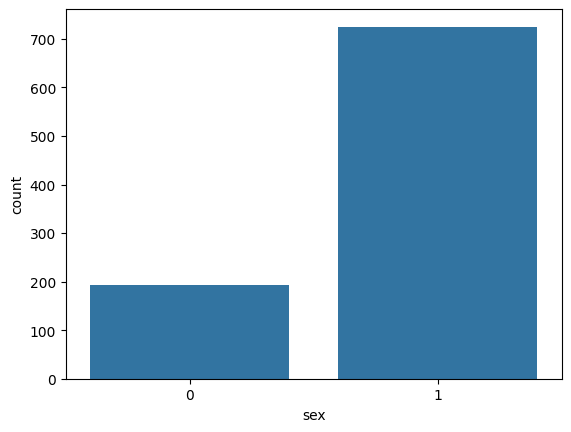

In [12]:
#Data visualization
#Breakdown of gender

x=(heart.sex.value_counts())
print(f'Number of people having sex as 1 are {x[0]} and Number of people having sex as 0 are {x[1]}')
p = sns.countplot(data=heart, x="sex")
plt.show()

In [ ]:
#data visualization
#breakdown of cp
x=(heart.cp.value_counts())
print(x)
p = sns.countplot(data=heart, x="cp")
plt.show()

In [ ]:
#data visualization
#Breakdown of ECG

x=(heart.restecg.value_counts())
print(x)
p = sns.countplot(data=heart, x="restecg")
plt.show()

In [ ]:
#data visualization
#Breakdown for Exercise Induced Angina

x=(heart.exng.value_counts())
print(x)
p = sns.countplot(data=heart, x="exng")
plt.show()

In [ ]:
#data visualization 
#Breakdown for Thalium Stress Test

x=(heart.thall.value_counts())
print(x)
p = sns.countplot(data=heart, x="thall")
plt.show()

In [ ]:
#Density distribution for Age

plt.figure(figsize=(10,10))
sns.displot(heart.age, color="red", label="Age", kde= True)
plt.legend()

In [ ]:
#Density distribution is highest for age group 55 to 60

plt.figure(figsize=(20,20))
sns.displot(heart.trtbps , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["chol"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol versus Age')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["trtbps"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Trtbs versus Age')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["thalachh"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Thalachh versus Age')
plt.show()

In [ ]:
#Pair Plot

plt.figure(figsize=(20,20))
sns.pairplot(heart)
plt.show()

In [ ]:
#Violin Plot

plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data = heart)
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data = heart)
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data = heart)
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data = heart)
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data = heart)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'fbs', y = 'output', data = heart)

plt.show()

In [13]:
#Data preprocessing
#There's no need for categorical encoding

x = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
x,y

(array([[  1. ,   2. , 140. , ...,   0. ,   0. ,   1. ],
        [  0. ,   3. , 160. , ...,   0. ,   1. ,   2. ],
        [  1. ,   2. , 130. , ...,   0. ,   0. ,   1. ],
        ...,
        [  1. ,   4. , 130. , ...,   1. ,   1.2,   2. ],
        [  0. ,   2. , 130. , ...,   0. ,   0. ,   2. ],
        [  1. ,   3. , 138. , ...,   0. ,   0. ,   1. ]]),
 array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0

In [14]:

#Splitting the dataset into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [15]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (734, 10) (734,)
Shape for testing data (184, 10) (184,)


In [16]:
#Feature Scaling

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
x_train,x_test

(array([[ 0.51740017,  0.81785035,  0.40398537, ...,  1.19939076,
          1.0553738 ,  0.59527342],
        [ 0.51740017,  0.81785035, -0.95050604, ...,  1.19939076,
          0.57784676,  0.59527342],
        [-1.93273999, -0.25411779,  1.48757849, ..., -0.83375663,
         -0.0906911 , -1.03506497],
        ...,
        [-1.93273999,  0.81785035, -0.24617051, ..., -0.83375663,
         -0.85473437, -1.03506497],
        [ 0.51740017,  0.81785035,  0.07890743, ...,  1.19939076,
          2.96548197,  2.22561181],
        [ 0.51740017, -0.25411779, -1.32976364, ..., -0.83375663,
         -0.85473437, -1.03506497]]),
 array([[ 0.51740017,  0.81785035, -0.95050604, ..., -0.83375663,
         -0.75922896,  0.59527342],
        [ 0.51740017,  0.81785035, -0.67960776, ..., -0.83375663,
         -0.47271274,  0.59527342],
        [ 0.51740017,  0.81785035, -1.22140432, ..., -0.83375663,
         -0.85473437,  0.59527342],
        ...,
        [ 0.51740017,  0.81785035, -1.11304501, ..., -

In [18]:
#1. Logistic Regression

model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[59 18]
 [13 94]]


The accuracy of Logistic Regression is :  83.15217391304348 %


In [19]:
#2.Gaussian Naive Bayes

model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  83.15217391304348 %


In [20]:
#3.Bernoulli Naive Bayes

model = BernoulliNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  81.52173913043478 %


In [21]:
#4.Support Vector Machine

model = SVC()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of SVM is :  84.78260869565217 %


In [22]:
#5.Random Forest

model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  86.41304347826086 %


In [23]:
#6.K Nearest Neighbours

  
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

[[63 14]
 [16 91]]
The accuracy of KNN is :  83.69565217391305 %


Text(0, 0.5, 'Error Rate')

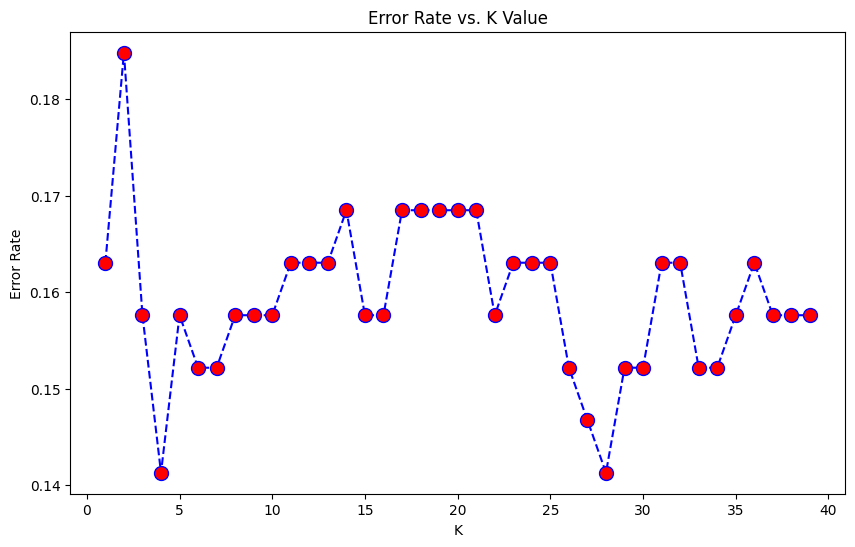

In [24]:
#Optimizing the KNN

error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
#With k=7 as it hovers after that

model = KNeighborsClassifier(n_neighbors = 7)
  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

Confusion Matrix :
[[62 15]
 [13 94]]


The accuracy of KNN is :  84.78260869565217 %


In [26]:
#7.X Gradient Boosting

model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
   
predicted = model.predict(x_test)
   
cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")


The accuracy of X Gradient Boosting is :  84.23913043478261 %


In [29]:
import random
print("Convolutional Neural Network (CNN)")
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier().fit(x_train, y_train)
y_pred = mlpc.predict(x_test)
print("ACCURACY")
print(accuracy_score(y_test, y_pred) * 100)

Convolutional Neural Network (CNN)
ACCURACY
86.41304347826086


C:\Users\pavan\AppData\Local\anaconda3\envs\tensor\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
random_index = random.randint(0, len(x_test) - 1)
random_patient = x_test[random_index]
predicted_result = mlpc.predict([random_patient])

if predicted_result == 1:
    print("The patient is predicted to have heart disease.")
else:
    print("The patient is predicted not to have heart disease.")

The patient is predicted to have heart disease.
